<img src="./pictures/DroneApp_logo.png" style="float:right; max-width: 180px; display: inline" alt="INSA" />
<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 100px; display: inline" alt="INSA" />

# Sizing scenarios definitions

*Written by Marc Budinger (INSA Toulouse) and Scott Delbecq (ISAE-SUPAERO), Toulouse, France.*

Before sizing a system, it is important to define all the constraints that could have an effect on the design. It is therefore advisable to list meticulously:
- the power components to size in the architecture 
- criteria and parameters useful for the selection of components 
- system usage scenarios that can "activate" these sizing scenarios 


### Drone architecture

We will represent first here the Work Breakdown Structure of the drone system with the components to be selected. 

Remark: 
Python can be used to represent the Work Breakdown Structure (WBS) of an architecture thanks to Graphviz graph diagram. 
- The Graphviz python wrapper can be installed with `conda install anaconda graphviz --force` and `conda install python-graphviz` for Anaconda python solution.   
- And you need also to install the [Graphviz visualization solution](https://www.graphviz.org/download/) (use the .msi install to have the 'PATH' well set-up)


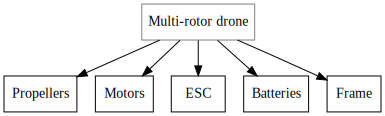

In [2]:
# Plot the WBS of the system
from graphviz import Digraph

dot = Digraph(comment='Drone system')
# System
dot.node('S', 'Multi-rotor drone', shape='rectangle', color='grey')

# Components
dot.node('C1', 'Propellers', shape='rectangle')
dot.node('C2', 'Motors', shape='rectangle')
dot.node('C3', 'ESC', shape='rectangle')
dot.node('C4', 'Batteries', shape='rectangle')
dot.node('C5', 'Frame', shape='rectangle')

dot.edge('S','C1')
dot.edge('S','C2')
dot.edge('S','C3')
dot.edge('S','C4')
dot.edge('S','C5')

# Render the graph into the notebook
dot

## Design drivers






We are going to determine here the possible reasons for the degradation in system’s components. These degrations can be:
- Fast and come from transient power demands (such as permanent deformation, rupture for mechanical components)
- Gradual and come from continuous power demands which often reduce the component’s and therefore the system’s lifetime (such as mechanical fatigue for mechanical components)

The component can also have imperfections which can increase the mechanical stresses on itself or other components.
For example, the inertia of an electrical motor increases the torque that this same motor has to deliver or can destroy mechanical component when a sudden stop occurs.

We will complete the graph with possible sources of degradation (represented as ellipes) of the components of the DC/DC converter.



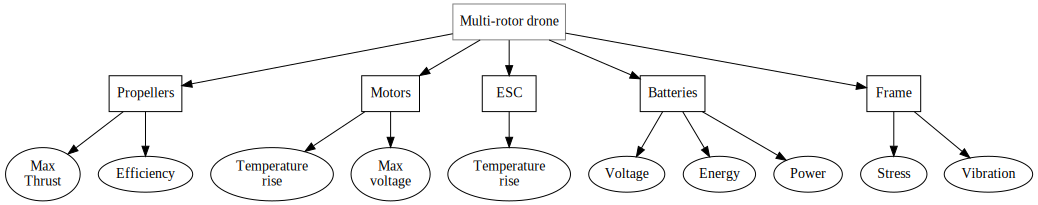

In [7]:
## Design drivers
# Propeller
dot.node('DD1', 'Max\nThrust')
dot.edge('C1', 'DD1')
dot.node('DD2', 'Efficiency')
dot.edge('C1', 'DD2')

# Motor
dot.node('DD3', 'Temperature\nrise')
dot.edge('C2', 'DD3')
dot.node('DD4', 'Max\nvoltage')
dot.edge('C2', 'DD4')

# ESC
dot.node('DD5', 'Temperature\nrise')
dot.edge('C3', 'DD5')

# Batteries
dot.node('DD7', 'Voltage')
dot.edge('C4', 'DD7')
dot.node('DD8', 'Energy')
dot.edge('C4', 'DD8')
dot.node('DD9', 'Power')
dot.edge('C4', 'DD9')

# Frame
dot.node('DD10', 'Stress')
dot.edge('C5', 'DD10')
dot.node('DD11', 'Vibration')
dot.edge('C5', 'DD11')

# Render the graph into the notebook
dot

### Sizing scenarios

We have listed the different degradation risks for our application. Now we have to determine the system usage cases which can create this degradation risks. These sizing scenarios are added on the graph as hexagon.   
A first version of the sizing code will take into account 2 main sizing scenarios:
- the hover flight which will define the flight time
- the take off which will define the maximum power operating points

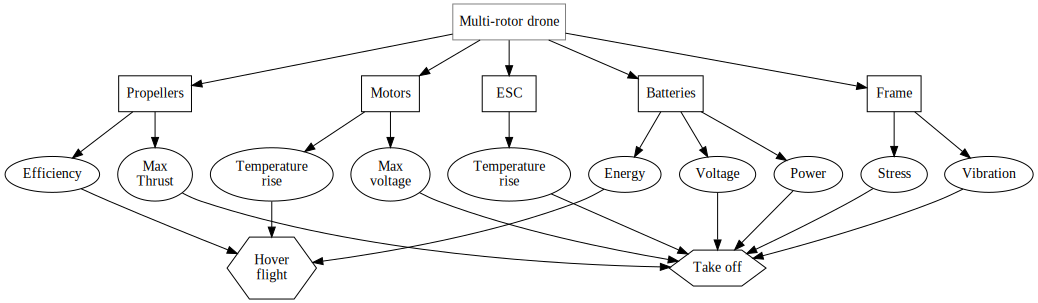

In [8]:
# Sizing scenarios
dot.node('SiS1', 'Hover \n flight', shape='hexagon')
dot.node('SiS2', 'Take off', shape='hexagon')

# Connections between design drivers and sizing scenarios
dot.edge('DD1', 'SiS2')
dot.edge('DD2', 'SiS1')
dot.edge('DD3', 'SiS1')
dot.edge('DD4', 'SiS2')
dot.edge('DD5', 'SiS2')
dot.edge('DD7', 'SiS2')
dot.edge('DD8', 'SiS1')
dot.edge('DD9', 'SiS2')
dot.edge('DD10', 'SiS2')
dot.edge('DD11', 'SiS2')

# Render the graph into the notebook
dot

A second version of the sizing code will take into account 3 main sizing scenarios:
- the hover flight which will define the flight time
- the take off which will define the maximum power operating points
- the vertical flight which will define, with the take off phase, the high power mission segments. 

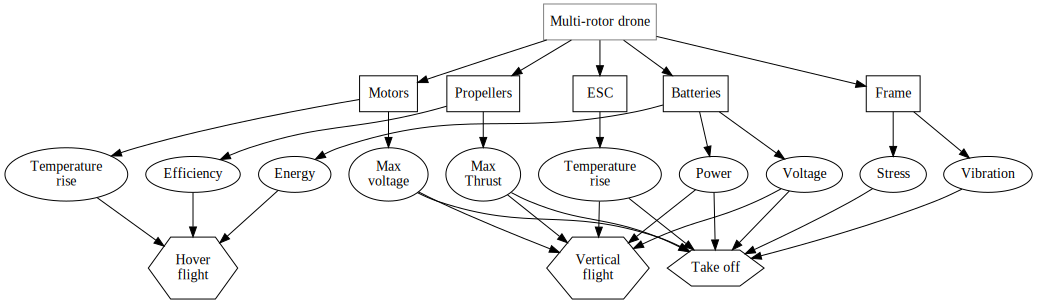

In [9]:
# Sizing scenarios
dot.node('SiS3', 'Vertical \nflight', shape='hexagon')

# Connections between design drivers and sizing scenarios
dot.edge('DD1', 'SiS3')
dot.edge('DD4', 'SiS3')
dot.edge('DD5', 'SiS3')
dot.edge('DD7', 'SiS3')
dot.edge('DD9', 'SiS3')

# Render the graph into the notebook
dot